## Import Required Libraries

In [1]:
# Basic Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# PyTorch and Torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import ResNet50_Weights

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, roc_curve, precision_score, recall_score

# Logging
import logging

# For handling malformed data
import ast

# Set up logging
logging.basicConfig(level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s")

# Seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

## Load and Visualize Clinical Data

Clinical Data Loaded Successfully.

Clinical Data Preview:
        Patient  RNASeqCluster  MethylationCluster  miRNACluster  CNCluster  \
0  TCGA_CS_4941            2.0                 4.0             2        2.0   
1  TCGA_CS_4942            1.0                 5.0             2        1.0   
2  TCGA_CS_4943            1.0                 5.0             2        1.0   
3  TCGA_CS_4944            NaN                 5.0             2        1.0   
4  TCGA_CS_5393            4.0                 5.0             2        1.0   

   RPPACluster  OncosignCluster  COCCluster  histological_type  \
0          NaN              3.0           2                1.0   
1          1.0              2.0           1                1.0   
2          2.0              2.0           1                1.0   
3          2.0              1.0           1                1.0   
4          2.0              3.0           1                1.0   

   neoplasm_histologic_grade  tumor_tissue_site  laterality  tumor_lo

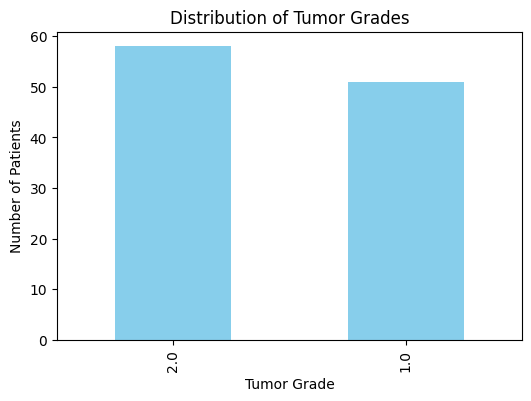

In [40]:
# Path to clinical data
clinical_data_path = r"C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\data.csv"

def load_clinical_data(filepath):
    """
    Load the clinical data from the specified CSV file.
    """
    try:
        clinical_data = pd.read_csv(filepath)
        print("Clinical Data Loaded Successfully.")
        return clinical_data
    except Exception as e:
        logging.error(f"Error loading clinical data: {e}")
        return None

def display_clinical_data_overview(data):
    """
    Display a brief overview and statistics of the clinical data.
    """
    if data is not None:
        print("\nClinical Data Preview:")
        print(data.head())
        print("\nClinical Data Description:")
        print(data.describe())
        print("\nMissing Values:")
        print(data.isnull().sum())

def plot_tumor_grade_distribution(data):
    """
    Plot the distribution of tumor grades.
    """
    if data is not None:
        plt.figure(figsize=(6, 4))
        data['neoplasm_histologic_grade'].value_counts().plot(kind='bar', color='skyblue')
        plt.title("Distribution of Tumor Grades")
        plt.xlabel("Tumor Grade")
        plt.ylabel("Number of Patients")
        plt.show()

# Main Execution
clinical_data = load_clinical_data(clinical_data_path)
if clinical_data is not None:
    display_clinical_data_overview(clinical_data)
    plot_tumor_grade_distribution(clinical_data)

## Visualize MRI Images and Masks

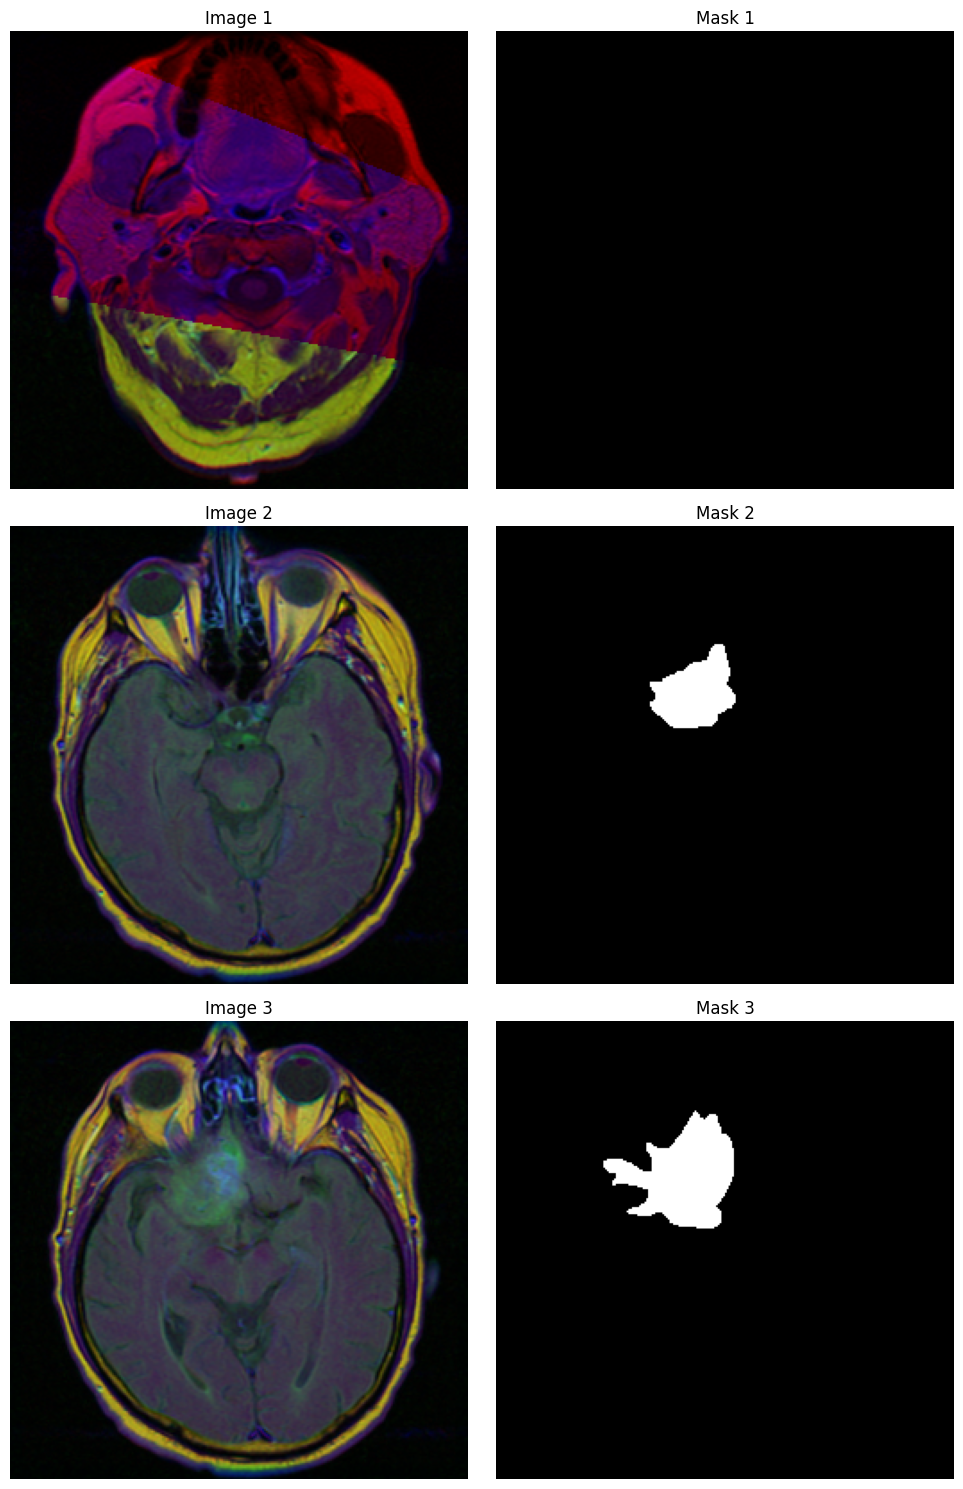

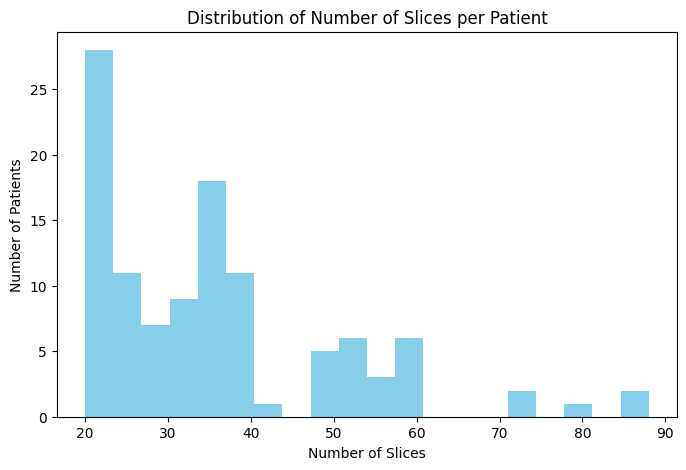

Average number of slices per patient: 35.72
Max number of slices for a patient: 88
Min number of slices for a patient: 20


In [41]:
# Path to the dataset
dataset_dir = r"C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\Dataset"

def load_image(image_path):
    """
    Load an image from the specified path.
    
    Args:
    image_path (str): Path to the image file.
    
    Returns:
    Image: Loaded image.
    """
    return Image.open(image_path)

def get_patient_folders(dataset_dir):
    """
    Retrieves a list of patient folder paths from the dataset directory.
    
    Args:
    dataset_dir (str): Path to the dataset directory.
    
    Returns:
    list: A list of paths to patient folders.
    """
    if os.path.exists(dataset_dir):
        return [os.path.join(dataset_dir, f) for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]
    else:
        print(f"Error: Directory not found - {dataset_dir}")
        return []

def display_images_and_masks(patient_folder, num_examples=3):
    """
    Displays the first few MRI images and their corresponding masks from a patient folder.
    
    Args:
    patient_folder (str): Path to the patient's folder.
    num_examples (int): Number of image/mask pairs to display.
    """
    image_files = sorted([f for f in os.listdir(patient_folder) if 'mask' not in f])
    mask_files = sorted([f for f in os.listdir(patient_folder) if 'mask' in f])

    fig, axes = plt.subplots(num_examples, 2, figsize=(10, 15))
    for i in range(num_examples):
        img = load_image(os.path.join(patient_folder, image_files[i]))
        msk = load_image(os.path.join(patient_folder, mask_files[i]))

        axes[i, 0].imshow(img, cmap='gray')
        axes[i, 0].set_title(f'Image {i + 1}')
        axes[i, 0].axis('off')

        axes[i, 1].imshow(msk, cmap='gray')
        axes[i, 1].set_title(f'Mask {i + 1}')
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

def analyze_slices_distribution(dataset_dir):
    """
    Analyzes and plots the distribution of the number of slices per patient.
    
    Args:
    dataset_dir (str): Path to the dataset directory.
    """
    patient_folders = get_patient_folders(dataset_dir)
    if patient_folders:
        num_slices = [len(os.listdir(folder)) // 2 for folder in patient_folders]  # Dividing by 2 because of image/mask pairs

        plt.figure(figsize=(8, 5))
        plt.hist(num_slices, bins=20, color='skyblue')
        plt.title('Distribution of Number of Slices per Patient')
        plt.xlabel('Number of Slices')
        plt.ylabel('Number of Patients')
        plt.show()

        print(f"Average number of slices per patient: {np.mean(num_slices):.2f}")
        print(f"Max number of slices for a patient: {np.max(num_slices)}")
        print(f"Min number of slices for a patient: {np.min(num_slices)}")
    else:
        print("No patient folders available for analysis.")

# Main execution block
if __name__ == "__main__":
    example_patient_folders = get_patient_folders(dataset_dir)
    if example_patient_folders:
        display_images_and_masks(example_patient_folders[0])
        analyze_slices_distribution(dataset_dir)
    else:
        print("Error: Check dataset directory path or ensure it contains patient folders.")

## Preprocess Images and Masks

In [59]:
def preprocess_image(image, target_size=(256, 256)):
    """
    Resize and normalize image to the target size and scale pixel values to [0, 1].
    
    Args:
        image (PIL.Image): Image to be processed.
        target_size (tuple): Tuple (width, height) indicating the new size of the image.
    
    Returns:
        numpy.ndarray: The processed image array.
    """
    try:
        image_resized = image.resize(target_size)
        image_array = np.array(image_resized)
        normalized_image = image_array / 255.0  # Normalize to [0, 1]
        return normalized_image
    except Exception as e:
        logging.error(f"Error processing image: {e}")
        return None

def save_image(image_array, filepath):
    """
    Save the processed image array back to disk as an image file.
    
    Args:
        image_array (numpy.ndarray): The processed image data to save.
        filepath (str): Path where the image will be saved.
    """
    try:
        Image.fromarray((image_array * 255).astype(np.uint8)).save(filepath)
        logging.info(f"Image saved to {filepath}")
    except Exception as e:
        logging.error(f"Failed to save image to {filepath}: {e}")

# Ensure the output directory exists
output_dir = r"C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data"
os.makedirs(output_dir, exist_ok=True)

# Check if the dataset directory exists before proceeding
if not os.path.exists(dataset_dir):
    logging.error(f"Dataset directory does not exist: {dataset_dir}")
else:
    for patient_folder in os.listdir(dataset_dir):
        patient_dir = os.path.join(dataset_dir, patient_folder)
        
        if os.path.isdir(patient_dir):
            image_files = [f for f in os.listdir(patient_dir) if not f.endswith('mask.tif')]
            mask_files = [f for f in os.listdir(patient_dir) if f.endswith('mask.tif')]
            
            for image_file, mask_file in zip(image_files, mask_files):
                image_path = os.path.join(patient_dir, image_file)
                mask_path = os.path.join(patient_dir, mask_file)
                
                try:
                    with Image.open(image_path) as img, Image.open(mask_path) as msk:
                        preprocessed_image = preprocess_image(img)
                        preprocessed_mask = preprocess_image(msk, target_size=(256, 256))
                        
                        if preprocessed_image is not None and preprocessed_mask is not None:
                            output_image_path = os.path.join(output_dir, f"{patient_folder}_preprocessed_{image_file}")
                            output_mask_path = os.path.join(output_dir, f"{patient_folder}_preprocessed_{mask_file}")
                            
                            save_image(preprocessed_image, output_image_path)
                            save_image(preprocessed_mask, output_mask_path)
                except Exception as e:
                    logging.error(f"Error processing files {image_file} or {mask_file}: {e}")

2024-12-02 10:27:36,691 - INFO - Image saved to C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\TCGA_CS_4941_19960909_preprocessed_TCGA_CS_4941_19960909_1.tif
2024-12-02 10:27:36,691 - INFO - Image saved to C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\TCGA_CS_4941_19960909_preprocessed_TCGA_CS_4941_19960909_10_mask.tif
2024-12-02 10:27:36,691 - INFO - Image saved to C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\TCGA_CS_4941_19960909_preprocessed_TCGA_CS_4941_19960909_10.tif
2024-12-02 10:27:36,691 - INFO - Image saved to C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\TCGA_CS_4941_19960909_preprocessed_TCGA_CS_4941_19960909_11_mask.tif
2024-12-02 10:27:36,703 - INFO - Image saved to C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\TCGA_CS_49

## Link Images with Clinical Data

In [60]:
def get_patient_id(filename):
    """
    Extracts the TCGA patient ID from a filename based on expected format 'TCGA_XX_XXXX'.

    Args:
        filename (str): The filename from which to extract the patient ID.

    Returns:
        str: The extracted patient ID if the format is correct, None otherwise.
    """
    parts = filename.split('_')
    if len(parts) >= 3:
        # Join the first three parts to form the patient ID
        return '_'.join(parts[:3])
    return None

def link_image_to_clinical(preprocessed_files, clinical_data, output_dir):
    """
    Links each image file with its corresponding clinical data based on patient ID.

    Args:
        preprocessed_files (list): List of preprocessed image filenames.
        clinical_data (DataFrame): DataFrame containing the clinical data.
        output_dir (str): The directory where image files are stored.

    Returns:
        DataFrame: A DataFrame with linked image paths and clinical data.
    """
    image_data_with_clinical = []
    for image_file in preprocessed_files:
        patient_id = get_patient_id(image_file)
        if patient_id:
            # Filter clinical data for the current patient ID
            patient_data = clinical_data[clinical_data['Patient'] == patient_id]
            if not patient_data.empty:
                # Append a dictionary with the image path and its corresponding clinical data
                image_data_with_clinical.append({
                    'image_path': os.path.join(output_dir, image_file),
                    'patient_id': patient_id,
                    'clinical_data': patient_data.iloc[0].to_dict()  # Convert DataFrame row to dict
                })
            else:
                print(f"Warning: No clinical data found for patient ID {patient_id}")
        else:
            print(f"Warning: Could not extract patient ID from filename {image_file}")
    return pd.DataFrame(image_data_with_clinical)

def save_to_csv(dataframe, output_path):
    """
    Saves the DataFrame to a CSV file.

    Args:
        dataframe (DataFrame): The DataFrame to save.
        output_path (str): Full path to the output CSV file.
    """
    if not dataframe.empty:
        dataframe.to_csv(output_path, index=False)
        print("CSV file saved successfully at:", output_path)
    else:
        print("No data to save to CSV.")

# Main execution block
if __name__ == "__main__":
    # Check if the clinical data file exists before proceeding
    if not os.path.exists(clinical_data_path):
        print(f"Error: The specified clinical data file does not exist: {clinical_data_path}")
    else:
        clinical_data = pd.read_csv(clinical_data_path)
        preprocessed_files = [f for f in os.listdir(output_dir) if not f.endswith('mask.tif')]
        linked_data = link_image_to_clinical(preprocessed_files, clinical_data, output_dir)
        save_to_csv(linked_data, os.path.join(output_dir, "image_clinical_data.csv"))
        print("Preprocessing and data integration completed.")

CSV file saved successfully at: C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data\image_clinical_data.csv
Preprocessing and data integration completed.


## Load Preprocessed Data

In [42]:
# Function to retrieve image and mask file paths
def get_image_mask_paths(data_dir, image_suffix=".tif", mask_suffix="_mask.tif"):
    """
    Retrieves lists of image and mask file paths from a directory, excluding mask files from the image list.
    """
    image_files = []
    mask_files = []
    for file in os.listdir(data_dir):
        if file.endswith(image_suffix) and not file.endswith(mask_suffix):
            image_files.append(os.path.join(data_dir, file))
        elif file.endswith(mask_suffix):
            mask_files.append(os.path.join(data_dir, file))
    
    return sorted(image_files), sorted(mask_files)

# Define the directory containing all the preprocessed data
data_dir = r"C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\preprocessed_data"

# Load the clinical data from a CSV file
clinical_data_path = os.path.join(data_dir, "image_clinical_data.csv")
clinical_data = pd.read_csv(clinical_data_path)

# Function to handle malformed clinical data entries
def ensure_dict(entry):
    """
    Ensures that each entry in the clinical data column is a valid dictionary.
    """
    if isinstance(entry, dict):  # Already a dictionary
        return entry
    try:
        entry = entry.replace('nan', 'None')  # Replace 'nan' with None
        return eval(entry)  # Evaluate the entry safely
    except (ValueError, SyntaxError):
        print(f"Malformed entry found: {entry}")
        return {}  # Return an empty dictionary for malformed entries

# Standardize the clinical data column
clinical_data['clinical_data'] = clinical_data['clinical_data'].apply(ensure_dict)

# Extract relevant fields into separate columns
clinical_data['age_at_initial_pathologic'] = clinical_data['clinical_data'].apply(lambda x: x.get('age_at_initial_pathologic', None))
clinical_data['gender'] = clinical_data['clinical_data'].apply(lambda x: x.get('gender', None))
clinical_data['neoplasm_histologic_grade'] = clinical_data['clinical_data'].apply(lambda x: x.get('neoplasm_histologic_grade', None))

# Retrieve image and mask paths
image_paths, mask_paths = get_image_mask_paths(data_dir)

# Check alignment of the data
if len(image_paths) != len(mask_paths) or len(image_paths) != len(clinical_data):
    print(f"Mismatch in dataset sizes! Images: {len(image_paths)}, Masks: {len(mask_paths)}, Clinical Entries: {len(clinical_data)}")
else:
    print(f"Dataset sizes are aligned: {len(image_paths)} images, {len(mask_paths)} masks, {len(clinical_data)} clinical entries.")

Dataset sizes are aligned: 3929 images, 3929 masks, 3929 clinical entries.


## Define PyTorch Dataset Class

In [43]:
# Custom dataset class
class ImageClinicalDataset(Dataset):
    """
    Custom dataset class to handle the loading and transforming of images, masks, and clinical data.
    """
    def __init__(self, image_paths, mask_paths, clinical_data, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.clinical_data = clinical_data
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = Image.open(self.image_paths[idx]).convert('RGB')
        mask = Image.open(self.mask_paths[idx]).convert('L')  # Assuming masks are single-channel

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        # Extract clinical data
        clinical_info = self.clinical_data.iloc[idx]
        age = clinical_info['age_at_initial_pathologic'] or 0
        gender = clinical_info['gender'] or 0
        grade = clinical_info['neoplasm_histologic_grade'] > 1 if clinical_info['neoplasm_histologic_grade'] is not None else 0

        clinical_tensor = torch.tensor([age, gender, grade], dtype=torch.float32)
        return image, mask, clinical_tensor
    
# Data augmentation for training
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])

# Standard transforms for testing
test_transforms = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])

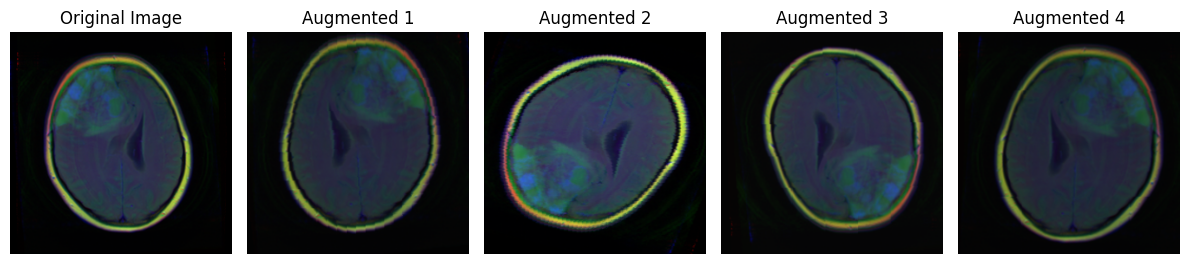

In [97]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
import random

# Data augmentation for training
data_transforms = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomResizedCrop(256, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor()
])

# Load a sample image from your dataset (provide the path to an image)
image_path = r"C:\Users\alish\OneDrive\Documents\Alishbah\CSE6367_COMPUTER VISION\Project\LGG\Dataset\TCGA_CS_5396_20010302\TCGA_CS_5396_20010302_17.tif"
original_image = Image.open(image_path)

# Apply the data augmentation pipeline multiple times to generate examples
augmented_images = [data_transforms(original_image) for _ in range(4)]

# Visualize original and augmented images
plt.figure(figsize=(12, 6))
plt.subplot(1, 5, 1)
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")

for i, aug_image in enumerate(augmented_images):
    # Convert tensor back to image for visualization
    aug_image_np = aug_image.permute(1, 2, 0).numpy()
    plt.subplot(1, 5, i + 2)
    plt.imshow(aug_image_np)
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.tight_layout()
plt.savefig("augmented_images_example.png")  # Save the figure
plt.show()


## Prepare DataLoaders

In [44]:
# Split the data into training and testing datasets
train_images, test_images, train_masks, test_masks, train_clinical, test_clinical = train_test_split(
    image_paths, mask_paths, clinical_data, test_size=0.2, random_state=42
)

# Instantiate the datasets and DataLoader for training and testing
train_dataset = ImageClinicalDataset(train_images, train_masks, train_clinical, transform=data_transforms)
test_dataset = ImageClinicalDataset(test_images, test_masks, test_clinical, transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

print("Data loading complete. Data loaders are ready for training and evaluation.")

Data loading complete. Data loaders are ready for training and evaluation.


## Define U-Net Model

In [45]:
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        
        # Define dropout for regularization to avoid overfitting
        self.dropout = nn.Dropout(0.3)
        
        # Encoder sections - progressively capture features and increase depth
        self.encoder1 = self.conv_block(3, 64)   # For 3-channel input images
        self.encoder2 = self.conv_block(64, 128)
        self.encoder3 = self.conv_block(128, 256)
        
        # Bottleneck - the deepest layer where features are most compressed
        self.bottleneck = self.conv_block(256, 512)
        
        # Decoder sections - progressively upsample and decrease depth
        self.decoder3 = self.conv_block(512 + 256, 256)  # Concatenation increases channels
        self.decoder2 = self.conv_block(256 + 128, 128)
        self.decoder1 = self.conv_block(128 + 64, 64)
        
        # Output layer to produce final segmentation map
        self.final_layer = nn.Conv2d(64, 1, kernel_size=1)  # Single channel output
        
        # Pooling to downsample and ConvTranspose for upsampling
        self.pool = nn.MaxPool2d(2, 2)
        self.upsample3 = nn.ConvTranspose2d(512, 512, kernel_size=2, stride=2)
        self.upsample2 = nn.ConvTranspose2d(256, 256, kernel_size=2, stride=2)
        self.upsample1 = nn.ConvTranspose2d(128, 128, kernel_size=2, stride=2)

    def conv_block(self, in_channels, out_channels):
        """Constructs a convolutional block with ReLU activation, dropout, and batch normalization."""
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            self.dropout
        )

    def forward(self, x):
        # Encoder path
        e1 = self.encoder1(x)
        p1 = self.pool(e1)
        e2 = self.encoder2(p1)
        p2 = self.pool(e2)
        e3 = self.encoder3(p2)
        p3 = self.pool(e3)
        
        # Bottleneck processing
        b = self.bottleneck(p3)
        
        # Decoder path with concatenation of skip connections from the encoder
        d3 = self.upsample3(b)
        d3 = torch.cat([d3, e3], dim=1)  # Combine features from encoder
        d3 = self.decoder3(d3)
        
        d2 = self.upsample2(d3)
        d2 = torch.cat([d2, e2], dim=1)
        d2 = self.decoder2(d2)
        
        d1 = self.upsample1(d2)
        d1 = torch.cat([d1, e1], dim=1)
        d1 = self.decoder1(d1)
        
        # Apply final layer and sigmoid activation to output probability maps
        return torch.sigmoid(self.final_layer(d1))

# Instantiate the model and move it to an appropriate device (GPU if available)
unet_model = UNet()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
unet_model.to(device)

print("Model is configured and ready on", device)

Model is configured and ready on cpu


## Define ResNet Classifier

In [46]:
class ResNetClassifier(nn.Module):
    def __init__(self):
        super(ResNetClassifier, self).__init__()
        
        # Pretrained ResNet50 model
        self.resnet = models.resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)
        
        # Replace the final fully connected layer with a custom one
        self.resnet.fc = nn.Linear(self.resnet.fc.in_features, 128)
        
        # Additional layers for binary classification
        self.fc1 = nn.Linear(128, 64)
        self.batch_norm = nn.BatchNorm1d(64)  # Batch normalization
        self.dropout = nn.Dropout(0.3)  # Dropout with a rate of 30%
        self.fc2 = nn.Linear(64, 1)  # Binary classification output
    
    def forward(self, x):
        # Pass through ResNet backbone
        x = self.resnet(x)
        
        # Additional fully connected layers with activation, batch norm, and dropout
        x = torch.relu(self.fc1(x))
        x = self.batch_norm(x)
        x = self.dropout(x)
        
        # Final output layer with sigmoid activation
        x = torch.sigmoid(self.fc2(x))
        return x
    
# Instantiate model
resnet_classifier = ResNetClassifier()

# Loss functions and optimizers
unet_criterion = nn.BCELoss()  # Binary cross-entropy for segmentation
resnet_criterion = nn.BCELoss()  # Binary cross-entropy for classification

unet_optimizer = optim.Adam(unet_model.parameters(), lr=1e-4)
resnet_optimizer = optim.Adam(resnet_classifier.parameters(), lr=1e-4)

## Train and Evaluate Models

In [ ]:
# Training loop
def train_model(unet, resnet, train_loader, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.to(device)
    resnet.to(device)
    
    for epoch in range(epochs):
        unet.train()
        resnet.train()
        
        running_loss_seg = 0.0
        running_loss_class = 0.0
        
        for images, masks, clinical_data in train_loader:
            images, masks, clinical_data = images.to(device), masks.to(device), clinical_data.to(device)
            
            # U-Net training for segmentation
            unet_optimizer.zero_grad()
            seg_output = unet(images)
            seg_loss = unet_criterion(seg_output, masks)
            seg_loss.backward()
            unet_optimizer.step()
            
            # ResNet training for classification
            resnet_optimizer.zero_grad()
            class_output = resnet(images)
            
            # Use binary tumor grade
            tumor_grade = clinical_data[:, 2].unsqueeze(1)
            class_loss = resnet_criterion(class_output, tumor_grade)
            class_loss.backward()
            resnet_optimizer.step()
            
            running_loss_seg += seg_loss.item()
            running_loss_class += class_loss.item()
        
        print(f"Epoch [{epoch+1}/{epochs}], Segmentation Loss: {running_loss_seg/len(train_loader)}, Classification Loss: {running_loss_class/len(train_loader)}")

# Train the models
train_model(unet_model, resnet_classifier, train_loader)

C:\Users\alish\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\alish\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/10], Segmentation Loss: 0.2150367392042211, Classification Loss: 0.6589714704275738
Epoch [2/10], Segmentation Loss: 0.11233575738795841, Classification Loss: 0.57337997789298
Epoch [3/10], Segmentation Loss: 0.08046132284418014, Classification Loss: 0.5185350632773708
Epoch [4/10], Segmentation Loss: 0.06611994138276607, Classification Loss: 0.4837543333077249
Epoch [5/10], Segmentation Loss: 0.058884165536508, Classification Loss: 0.47213216194214713
Epoch [6/10], Segmentation Loss: 0.055497946881193846, Classification Loss: 0.4347130684679701
Epoch [7/10], Segmentation Loss: 0.052887407792661024, Classification Loss: 0.4163084609514581
Epoch [8/10], Segmentation Loss: 0.05192557682043875, Classification Loss: 0.3780887093935304
Epoch [9/10], Segmentation Loss: 0.0508472454750735, Classification Loss: 0.37822421429721453
Epoch [10/10], Segmentation Loss: 0.04974227637033578, Classification Loss: 0.3523060617821514


## Save Models

In [49]:
# Save U-Net model
torch.save(unet_model.state_dict(), 'unet_model.pth')

# Save ResNet model
torch.save(resnet_classifier.state_dict(), 'resnet_classifier.pth')

## Reload Saved Models

In [47]:
unet_model = UNet()
unet_model.load_state_dict(torch.load('unet_model.pth'))
unet_model.eval()

resnet_classifier = ResNetClassifier()
resnet_classifier.load_state_dict(torch.load('resnet_classifier.pth'))
resnet_classifier.eval()

ResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

## Evaluate Models

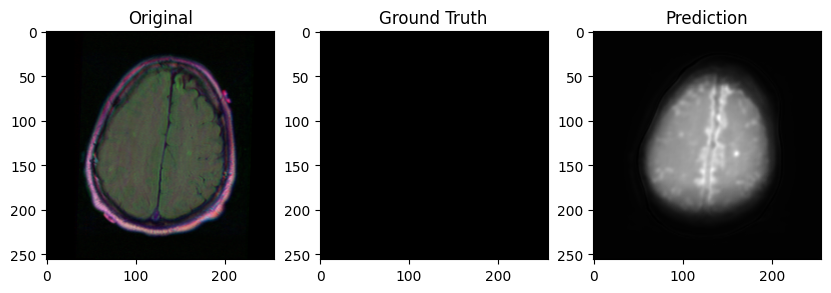

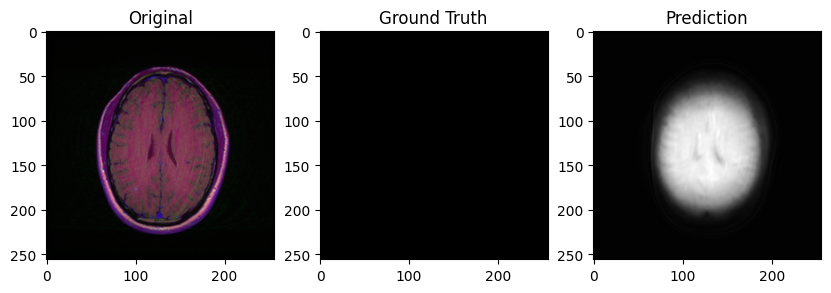

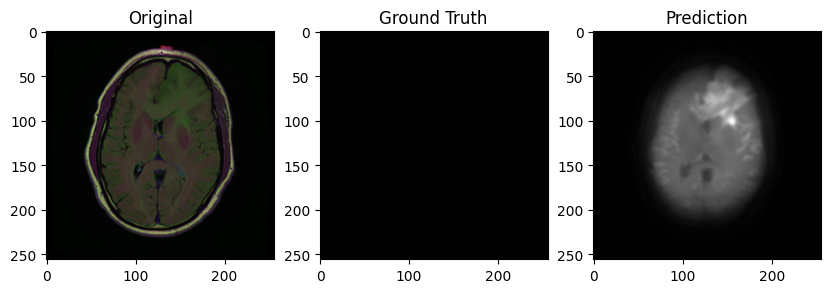

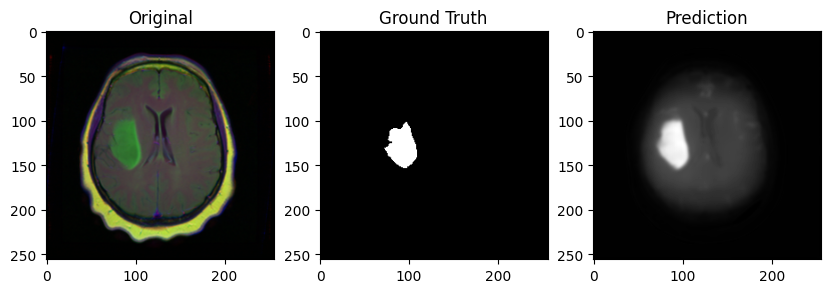

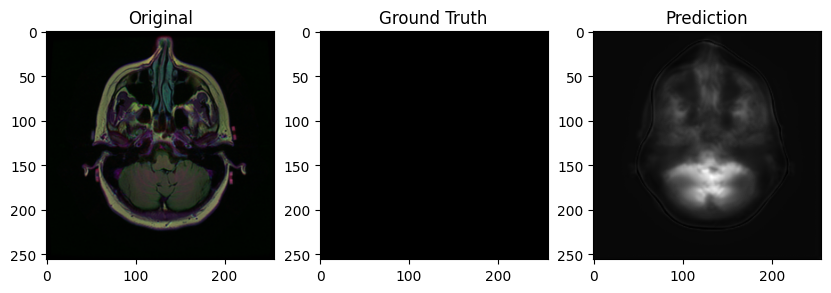

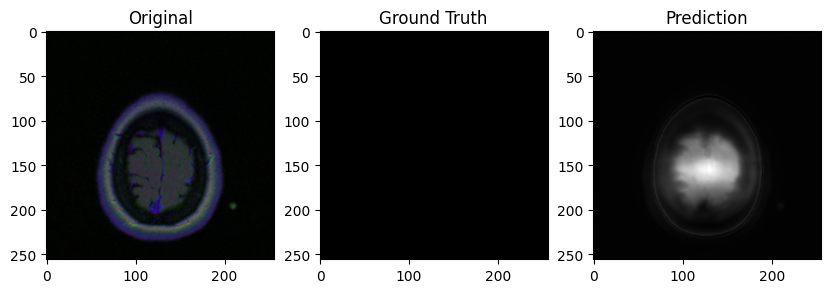

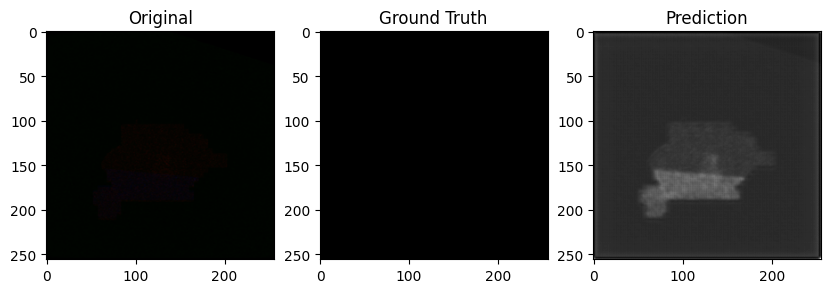

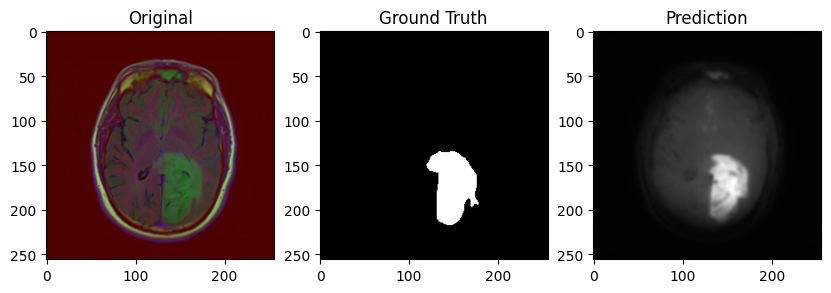

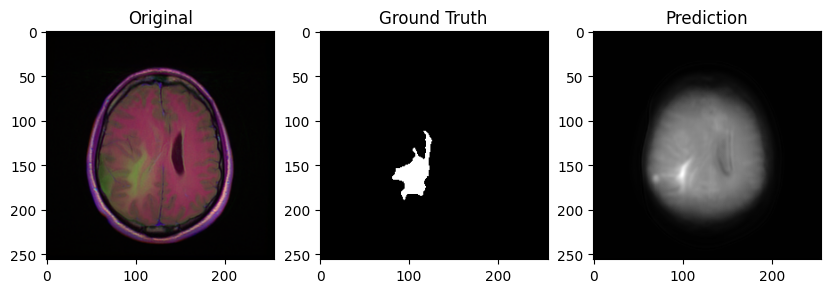

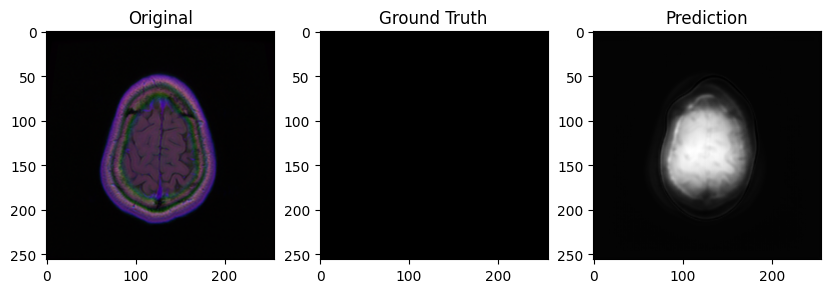

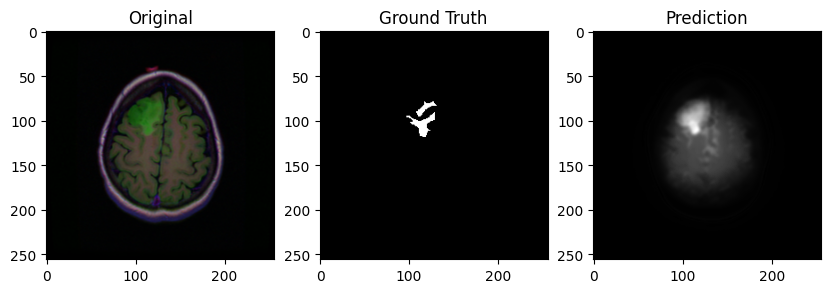

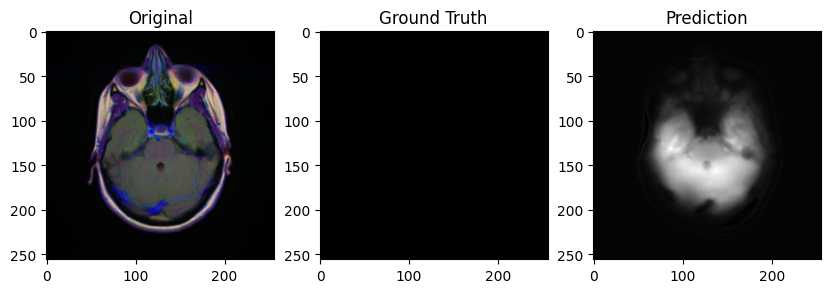

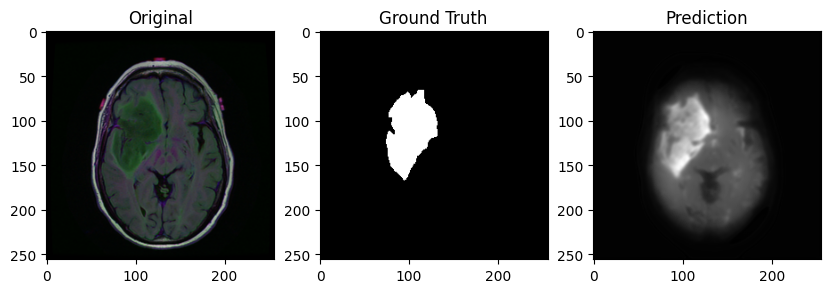

Test Set - Segmentation Loss: 0.0375, Classification Loss: 0.2751, Accuracy: 0.8813, F1-Score: 0.8597


In [48]:
def calculate_metrics(output, target):
    """
    Utility function to calculate classification metrics.
    Args:
        output (torch.Tensor): Predicted outputs.
        target (torch.Tensor): Ground truth labels.
    Returns:
        tuple: Accuracy and F1 score.
    """
    pred = (output > 0.5).float()
    accuracy = accuracy_score(target.cpu(), pred.cpu())
    f1 = f1_score(target.cpu(), pred.cpu())
    return accuracy, f1

def evaluate_model(unet, resnet, test_loader):
    """
    Evaluates the U-Net and ResNet models on the test set.
    Args:
        unet (torch.nn.Module): U-Net model for segmentation.
        resnet (torch.nn.Module): ResNet model for classification.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.eval()
    resnet.eval()
    
    total_seg_loss = 0.0
    total_class_loss = 0.0
    total_accuracy = 0.0
    total_f1 = 0.0

    with torch.no_grad():  # Disable gradient computation for evaluation
        for images, masks, clinical_data in test_loader:
            images, masks, clinical_data = images.to(device), masks.to(device), clinical_data.to(device)
            
            # U-Net evaluation
            seg_output = unet(images)
            seg_loss = unet_criterion(seg_output, masks)
            total_seg_loss += seg_loss.item()

            # Visualize segmentation results
            if np.random.rand() < 0.1:  # Randomly pick images to display
                plt.figure(figsize=(10, 4))
                
                # Original Image
                plt.subplot(1, 3, 1)
                plt.imshow(images[0].cpu().numpy().transpose((1, 2, 0)))  # (H, W, C)
                plt.title("Original")
                
                # Ground Truth Mask
                plt.subplot(1, 3, 2)
                plt.imshow(masks[0].cpu().squeeze().numpy(), cmap='gray')  # (H, W)
                plt.title("Ground Truth")
                
                # Predicted Mask
                plt.subplot(1, 3, 3)
                plt.imshow(seg_output[0].cpu().squeeze().numpy(), cmap='gray') # (H, W) 
                plt.title("Prediction")
                plt.show()
        
            # ResNet evaluation
            class_output = resnet(images)
            tumor_grade = clinical_data[:, 2].unsqueeze(1)
            class_loss = resnet_criterion(class_output, tumor_grade)
            total_class_loss += class_loss.item()

            # Calculate additional metrics for classification
            acc, f1 = calculate_metrics(class_output, tumor_grade)
            total_accuracy += acc
            total_f1 += f1

    avg_seg_loss = total_seg_loss / len(test_loader)
    avg_class_loss = total_class_loss / len(test_loader)
    avg_accuracy = total_accuracy / len(test_loader)
    avg_f1 = total_f1 / len(test_loader)

    print(f"Test Set - Segmentation Loss: {avg_seg_loss:.4f}, Classification Loss: {avg_class_loss:.4f}, "
            f"Accuracy: {avg_accuracy:.4f}, F1-Score: {avg_f1:.4f}")
    
# Run evaluation on test set
evaluate_model(unet_model, resnet_classifier, test_loader)


## Calculate Dice Coefficient

In [51]:
def dice_coefficient(pred, target, threshold=0.5):
    smooth = 1.0  # Avoid division by zero
    pred = (pred > threshold).float()  # Apply threshold
    intersection = (pred * target).sum()
    dice = (2. * intersection + smooth) / (pred.sum() + target.sum() + smooth)
    return dice.item()

# Calculating Dice coefficient for the test set
def evaluate_dice(unet, test_loader):
    """
    Evaluates the average Dice coefficient on the test set.
    Args:
        unet (torch.nn.Module): U-Net model for segmentation.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.eval()
    
    dice_scores = []
    with torch.no_grad():
        for images, masks, _ in test_loader:
            images, masks = images.to(device), masks.to(device)
            seg_output = unet(images)
            dice_score = dice_coefficient(seg_output, masks)
            dice_scores.append(dice_score)
    
    avg_dice = np.mean(dice_scores)
    print(f"Average Dice Coefficient on Test Set: {avg_dice:.4f}")

# Run Dice evaluation
evaluate_dice(unet_model, test_loader)

Average Dice Coefficient on Test Set: 0.0711


## Evaluate Classification Metrics

Threshold: 0.5
Accuracy: 0.8804
Precision: 0.8782
Recall: 0.8782
F1 Score: 0.8782
AUC: 0.9543


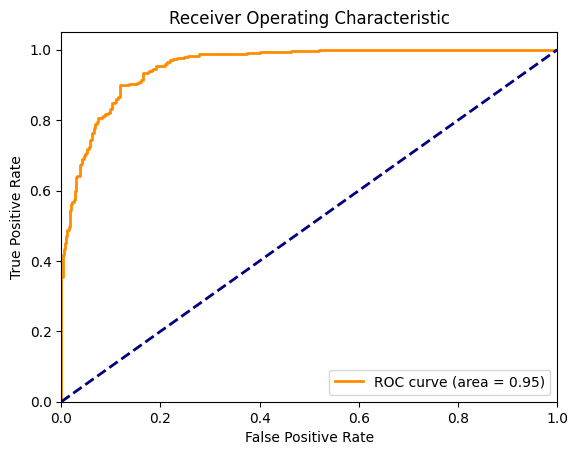

In [63]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

def evaluate_classification(resnet, test_loader, threshold=0.5):
    """
    Evaluates the ResNet classification model on the test set and provides various metrics.

    Args:
        resnet (torch.nn.Module): ResNet classification model.
        test_loader (torch.utils.data.DataLoader): DataLoader for the test set.
        threshold (float): Threshold for converting probabilities to binary labels.

    Returns:
        None
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    resnet.eval()

    all_labels = []
    all_preds = []

    with torch.no_grad():
        for images, _, clinical_data in test_loader:
            images = images.to(device)
            labels = clinical_data[:, 2].cpu().numpy()  # Binary tumor grade
            preds = resnet(images).cpu().numpy()  # Predictions without additional sigmoid
            
            all_labels.extend(labels)
            all_preds.extend(preds.ravel())

    # Convert probabilities to binary predictions using the specified threshold
    pred_labels = (np.array(all_preds) > threshold).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(all_labels, pred_labels)
    precision = precision_score(all_labels, pred_labels)
    recall = recall_score(all_labels, pred_labels)
    f1 = f1_score(all_labels, pred_labels)
    auc = roc_auc_score(all_labels, all_preds)

    # Print metrics
    print(f"Threshold: {threshold}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(all_labels, all_preds)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Run classification evaluation
evaluate_classification(resnet_classifier, test_loader, threshold=0.5)

## Visualize Predictions

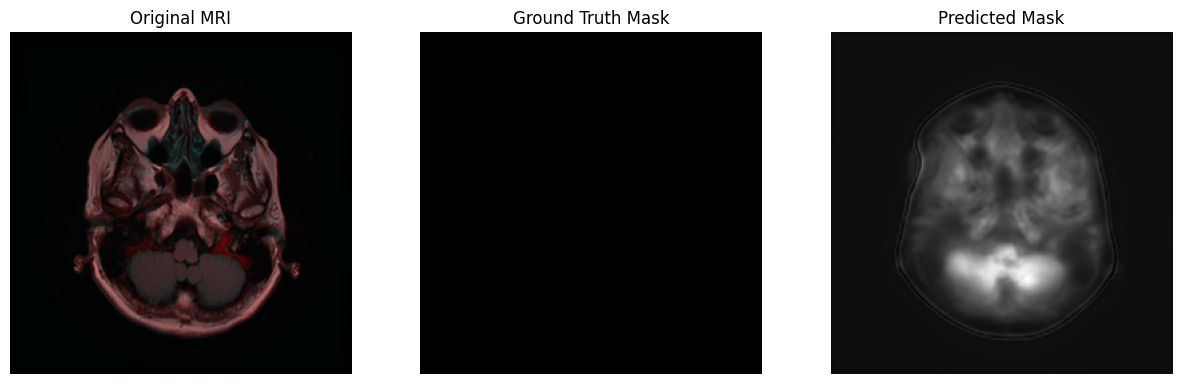

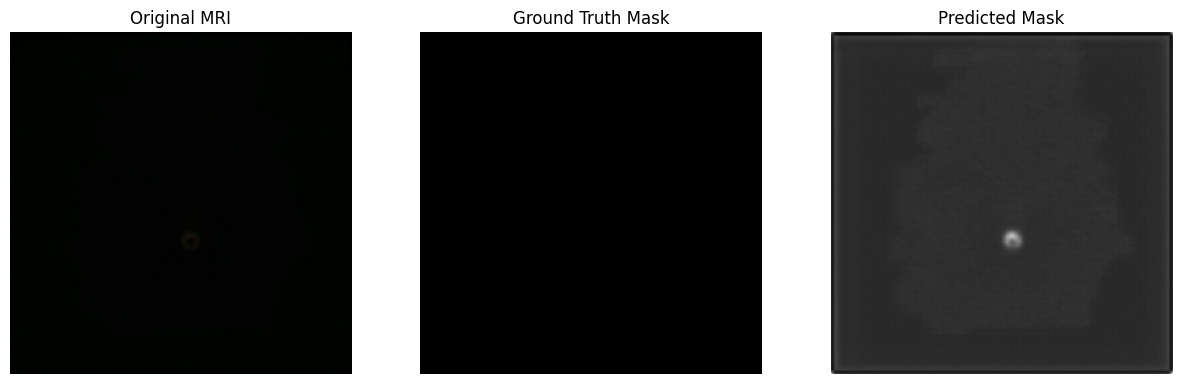

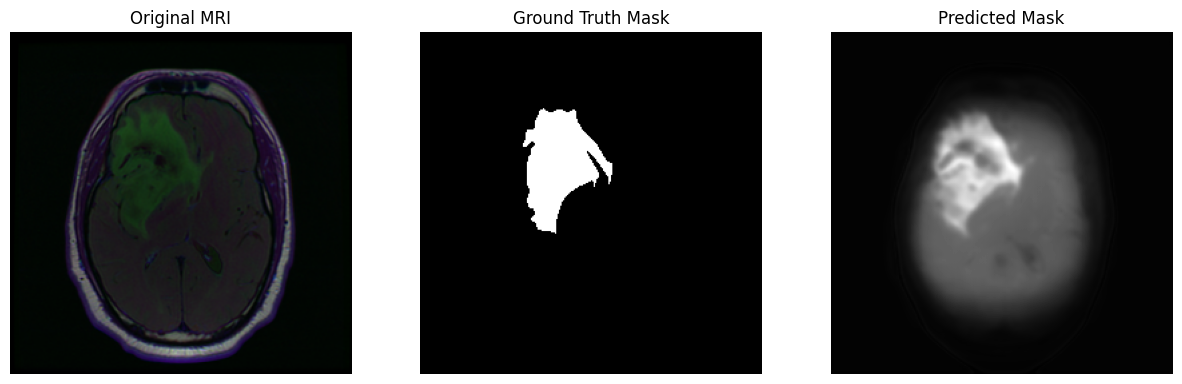

In [62]:
def visualize_predictions(unet, test_loader, num_samples=3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.eval()
    
    with torch.no_grad():
        for batch in test_loader:  # Process one batch from the test loader
            images, masks, _ = batch
            images, masks = images.to(device), masks.to(device)
            
            seg_output = unet(images)  # Get segmentation predictions
            
            # Convert tensors to numpy arrays for visualization
            images_np = images.cpu().numpy().transpose(0, 2, 3, 1)  # (N, H, W, C)
            masks_np = masks.cpu().numpy().squeeze(1)  # (N, H, W)
            seg_output_np = seg_output.cpu().numpy().squeeze(1)  # (N, H, W)
            
            # Plotting the first 'num_samples' from the batch
            for i in range(min(num_samples, images_np.shape[0])):
                plt.figure(figsize=(15, 5))
                
                plt.subplot(1, 3, 1)
                plt.imshow(images_np[i], cmap='gray')
                plt.title('Original MRI')
                plt.axis('off')
                
                plt.subplot(1, 3, 2)
                plt.imshow(masks_np[i], cmap='gray')
                plt.title('Ground Truth Mask')
                plt.axis('off')
                
                plt.subplot(1, 3, 3)
                plt.imshow(seg_output_np[i], cmap='gray')
                plt.title('Predicted Mask')
                plt.axis('off')
                
                plt.show()
            
            break  # Only process the first batch for visualization

# Run visualization
visualize_predictions(unet_model, test_loader)

## Checking for Overfitting or Underfitting

In [65]:
def evaluate_dice(unet, data_loader):
    """
    Calculates the average Dice coefficient for the given data loader.
    Args:
        unet (torch.nn.Module): Trained U-Net model.
        data_loader (torch.utils.data.DataLoader): DataLoader for the dataset (train/test/validation).
    Returns:
        float: Average Dice coefficient.
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.eval()
    
    dice_scores = []
    
    with torch.no_grad():
        for images, masks, _ in data_loader:
            images, masks = images.to(device), masks.to(device)
            seg_output = unet(images)
            dice_score = dice_coefficient(seg_output, masks)
            dice_scores.append(dice_score)
    
    avg_dice = np.mean(dice_scores)
    print(f"Average Dice Coefficient: {avg_dice}")
    return avg_dice


In [66]:
# Calculate average Dice for training and validation/test
train_dice = evaluate_dice(unet_model, train_loader)  # Function now returns Dice coefficient
test_dice = evaluate_dice(unet_model, test_loader)

print(f"Training Dice Coefficient: {train_dice:.4f}")
print(f"Validation/Test Dice Coefficient: {test_dice:.4f}")


Average Dice Coefficient: 0.0233030659109394
Average Dice Coefficient: 0.07111998472953358
Training Dice Coefficient: 0.0233
Validation/Test Dice Coefficient: 0.0711


## Load the Saved Model

In [67]:
# Load U-Net model
unet_model = UNet()
unet_model.load_state_dict(torch.load('unet_model.pth'))
unet_model.to(device)

# Load ResNet model
resnet_classifier = ResNetClassifier()
resnet_classifier.load_state_dict(torch.load('resnet_classifier.pth'))
resnet_classifier.to(device)

ResNetClassifier(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
  

## Reduce Learning Rate

In [68]:
# Define optimizers with a reduced learning rate
unet_optimizer = torch.optim.Adam(unet_model.parameters(), lr=1e-5)
resnet_optimizer = torch.optim.Adam(resnet_classifier.parameters(), lr=1e-5)

## Modify Loss Function

In [69]:
class DiceLoss(nn.Module):
    def forward(self, pred, target):
        smooth = 1.0
        pred = pred.contiguous()
        target = target.contiguous()
        intersection = (pred * target).sum(dim=2).sum(dim=2)
        loss = 1 - ((2. * intersection + smooth) / 
                    (pred.sum(dim=2).sum(dim=2) + target.sum(dim=2).sum(dim=2) + smooth))
        return loss.mean()

def combined_loss(pred, target):
    bce_loss = nn.BCELoss()(pred, target)
    dice_loss = DiceLoss()(pred, target)
    return bce_loss + dice_loss

## Freeze Layers

In [70]:
# Freeze all layers except the last fully connected layers
for param in resnet_classifier.resnet.parameters():
    param.requires_grad = False

# Unfreeze only the final layers
for param in resnet_classifier.fc1.parameters():
    param.requires_grad = True
for param in resnet_classifier.fc2.parameters():
    param.requires_grad = True


## Fine-Tuning Process

Epoch 1/5, Train Segmentation Loss: 1.0171240565127695, Train Classification Loss: 0.3339419522282428
Epoch 2/5, Train Segmentation Loss: 1.0143735754580898, Train Classification Loss: 0.3257828517876205
Epoch 3/5, Train Segmentation Loss: 1.0120676812021483, Train Classification Loss: 0.3328911737934627
Epoch 4/5, Train Segmentation Loss: 1.0138565614326613, Train Classification Loss: 0.33480111079209934
Epoch 5/5, Train Segmentation Loss: 1.0114933109768778, Train Classification Loss: 0.32780927463266385


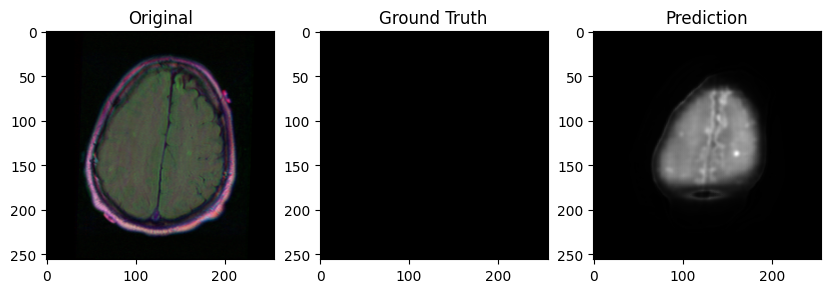

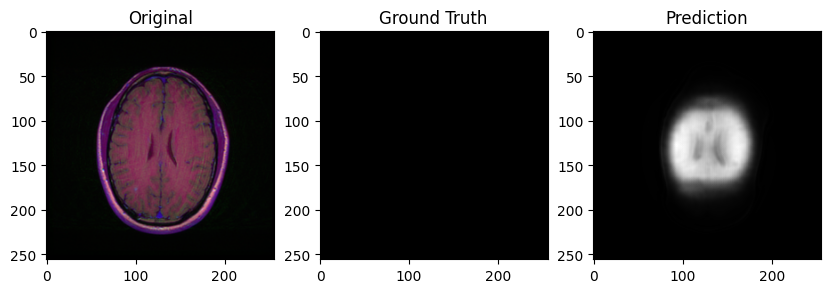

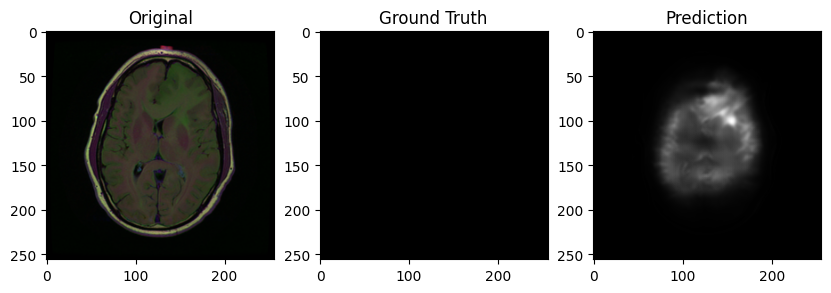

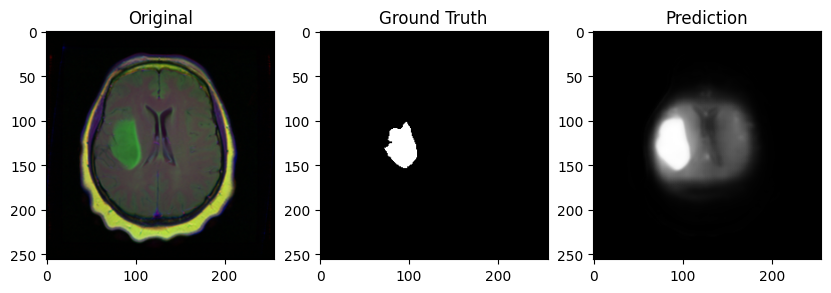

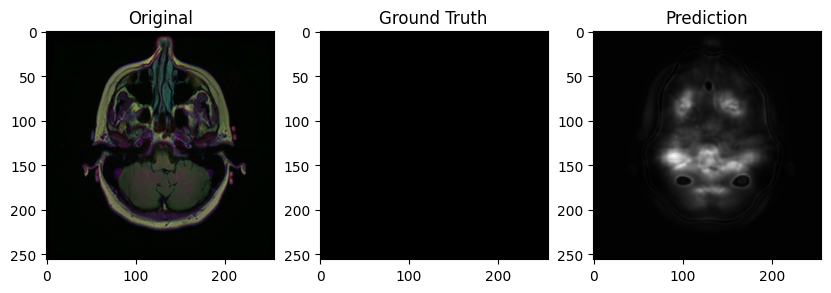

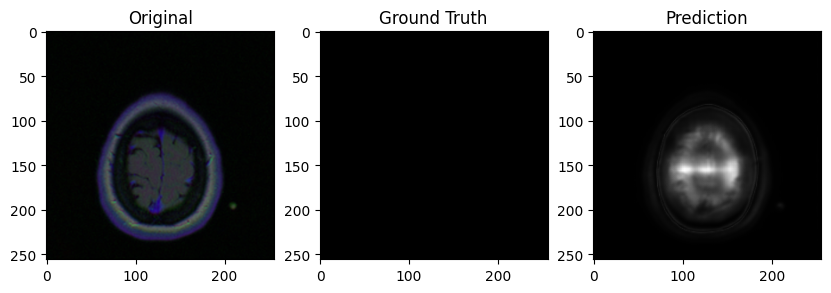

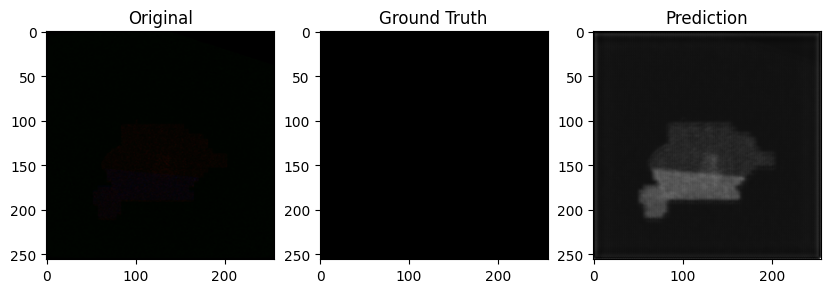

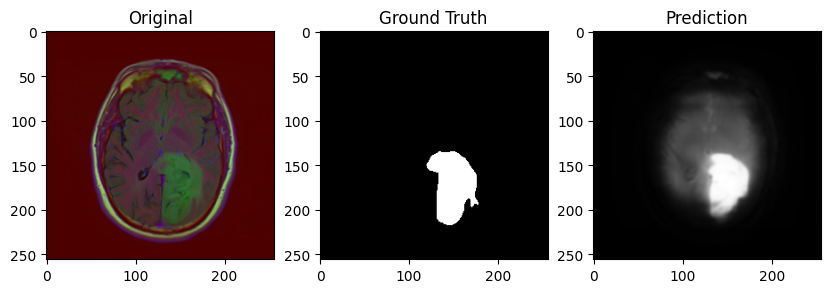

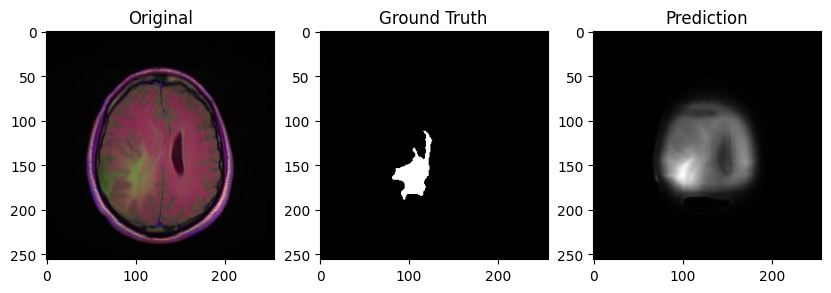

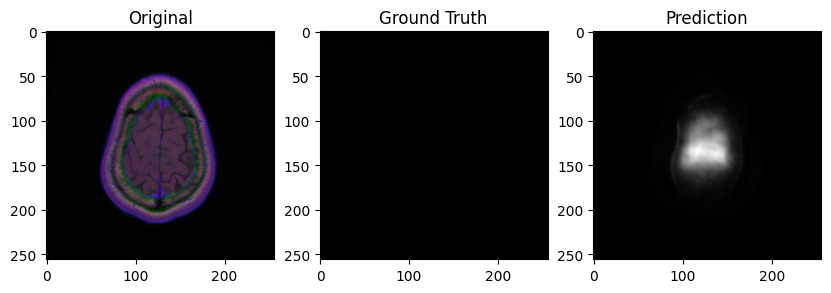

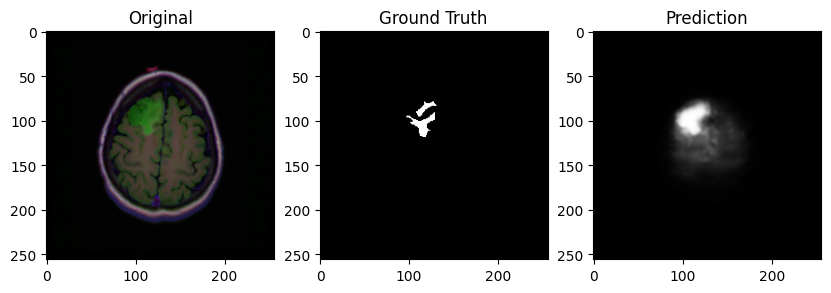

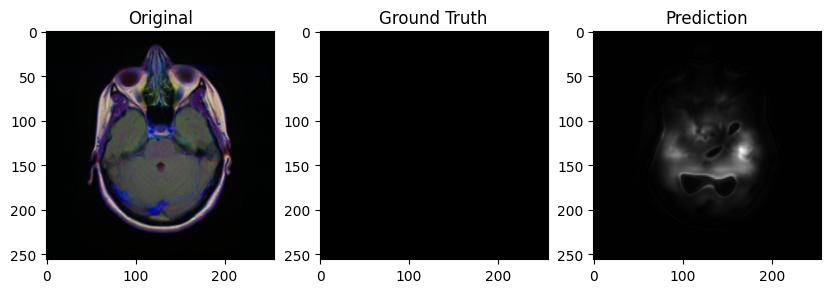

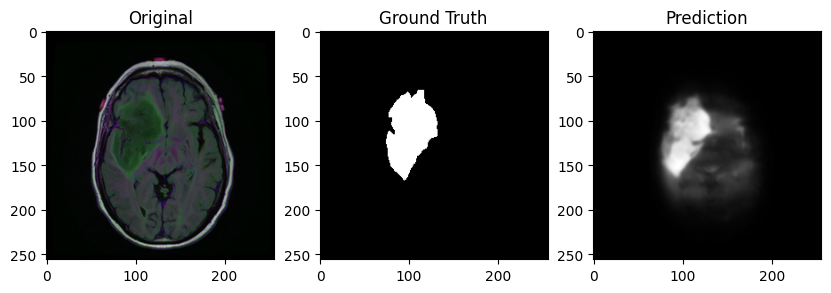

Test Set - Segmentation Loss: 0.0374, Classification Loss: 0.2689, Accuracy: 0.8763, F1-Score: 0.8429


In [71]:
def fine_tune_model(unet, resnet, train_loader, val_loader, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    unet.to(device)
    resnet.to(device)
    
    for epoch in range(epochs):
        unet.train()
        resnet.train()
        train_seg_loss = 0.0
        train_class_loss = 0.0
        
        for images, masks, clinical_data in train_loader:
            images, masks, clinical_data = images.to(device), masks.to(device), clinical_data.to(device)
            
            # U-Net Training
            unet_optimizer.zero_grad()
            seg_output = unet(images)
            seg_loss = combined_loss(seg_output, masks)
            seg_loss.backward()
            unet_optimizer.step()
            train_seg_loss += seg_loss.item()
            
            # ResNet Training
            resnet_optimizer.zero_grad()
            class_output = resnet(images)
            tumor_grade = clinical_data[:, 2].unsqueeze(1)
            class_loss = resnet_criterion(class_output, tumor_grade)
            class_loss.backward()
            resnet_optimizer.step()
            train_class_loss += class_loss.item()
        
        print(f"Epoch {epoch+1}/{epochs}, Train Segmentation Loss: {train_seg_loss/len(train_loader)}, "
              f"Train Classification Loss: {train_class_loss/len(train_loader)}")
    
    # Validate after fine-tuning
    evaluate_model(unet, resnet, val_loader)

# Run fine-tuning
fine_tune_model(unet_model, resnet_classifier, train_loader, test_loader, epochs=5)

## Save the Fine-Tuned Model

In [72]:
torch.save(unet_model.state_dict(), 'unet_model_fine_tuned.pth')
torch.save(resnet_classifier.state_dict(), 'resnet_classifier_fine_tuned.pth')

## Evaluate the Fine-Tuned Model

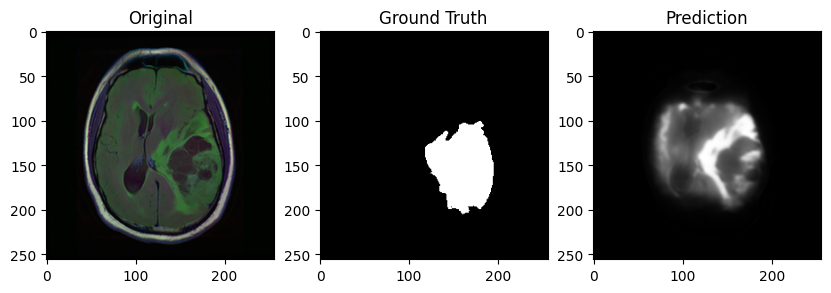

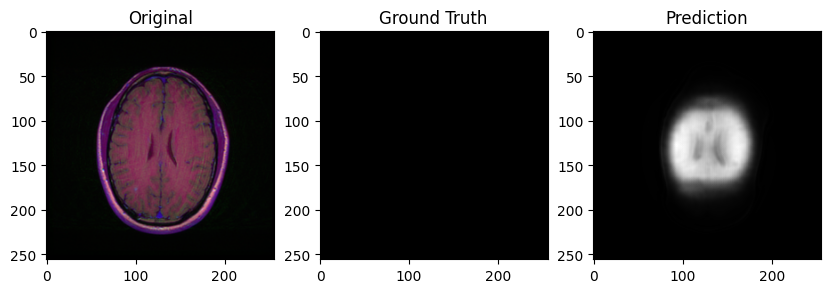

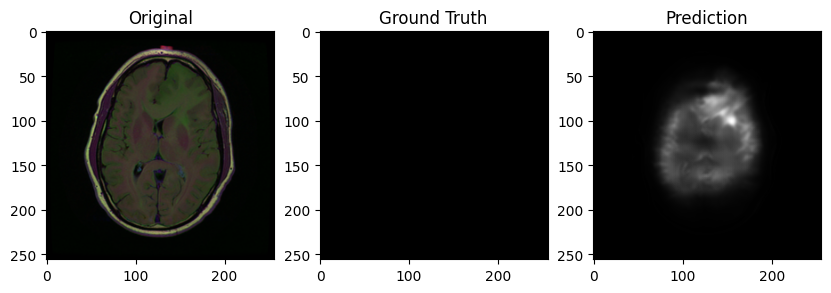

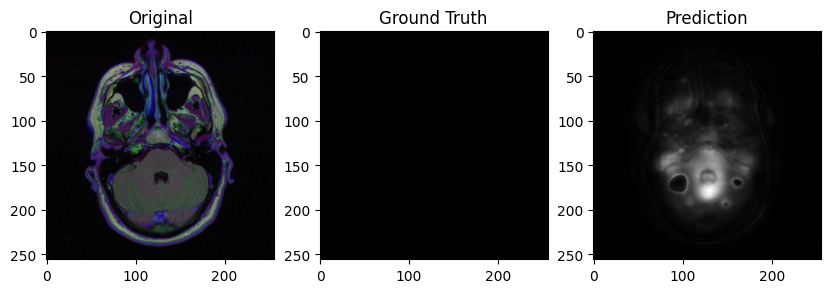

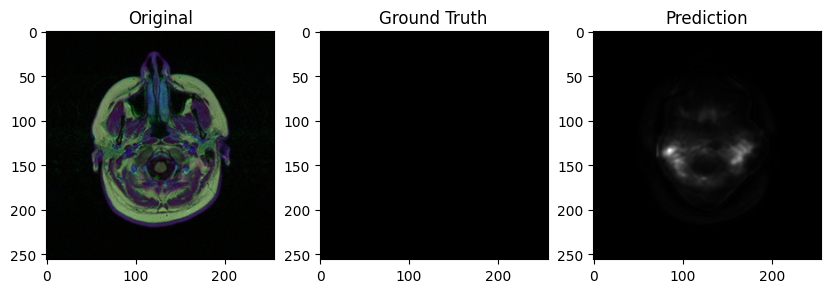

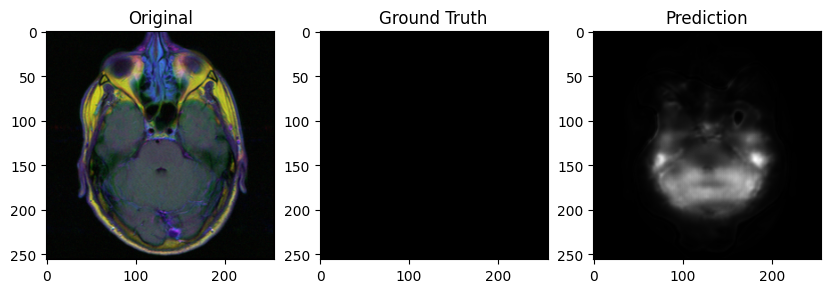

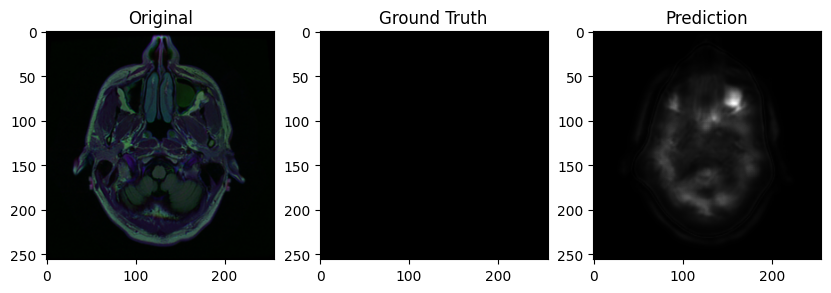

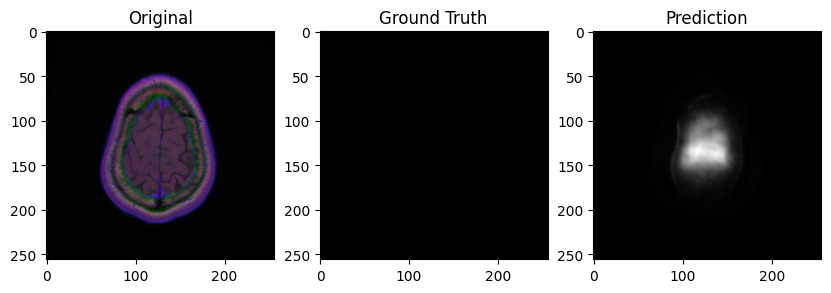

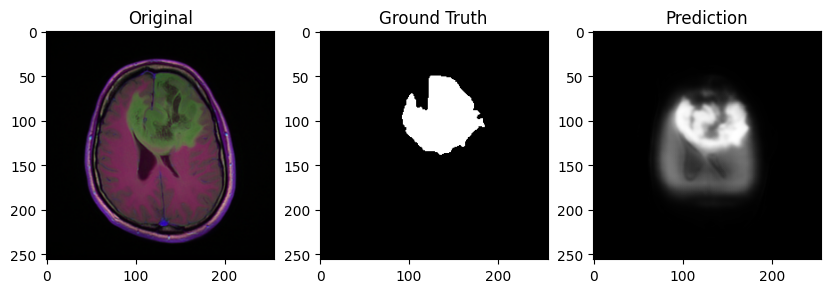

Test Set - Segmentation Loss: 0.0374, Classification Loss: 0.2689, Accuracy: 0.8763, F1-Score: 0.8429
Average Dice Coefficient: 0.3854381780047058


0.3854381780047058

In [73]:
evaluate_model(unet_model, resnet_classifier, test_loader)
evaluate_dice(unet_model, test_loader)

In [1]:
combined_loss(unet_model, test_loader)

NameError: name 'combined_loss' is not defined